In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Load dataset
df = pd.read_csv('Titanic-Dataset.csv') 

In [4]:
# Preview data
print("First 5 rows:")
print(df.head())

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

In [5]:
# Step 1: Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch

In [6]:
# Step 2: Histograms for numeric features
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

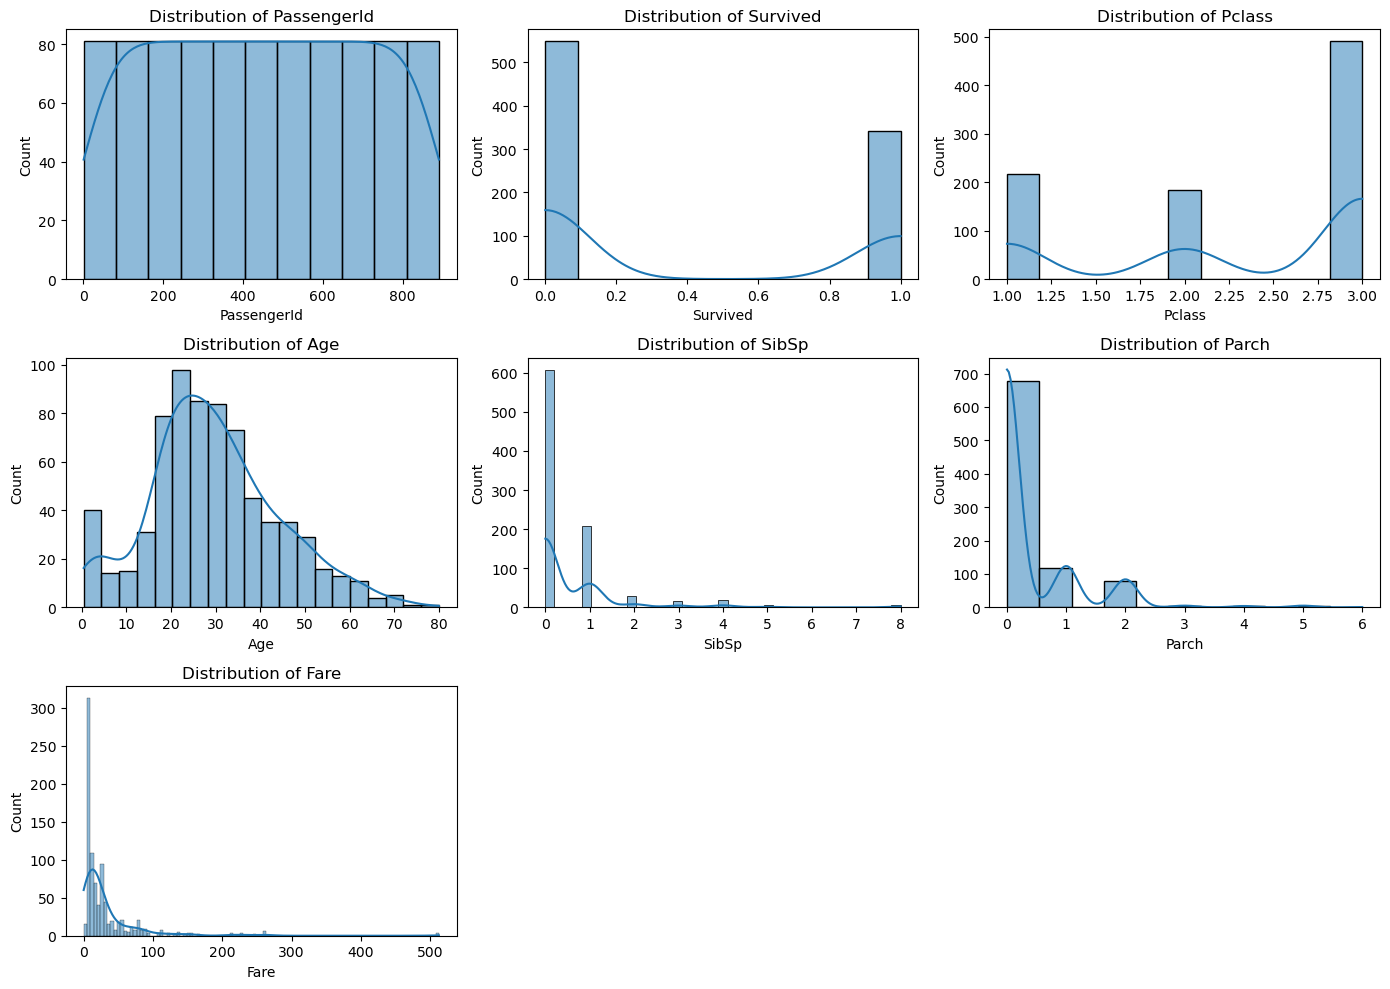

In [7]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

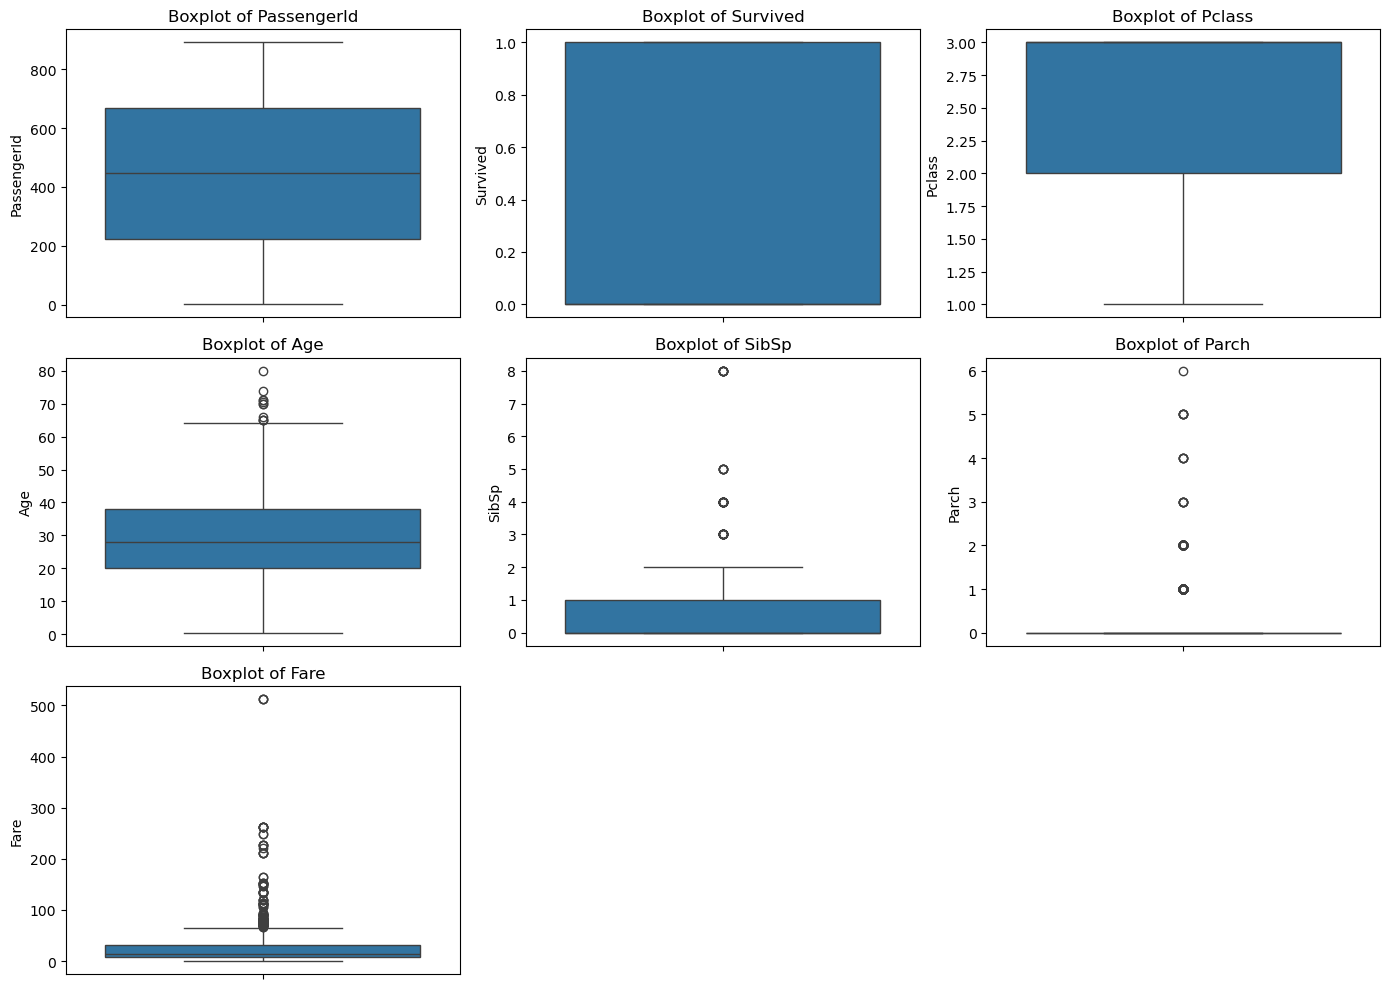

In [8]:

# Step 3: Boxplots to detect outliers
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


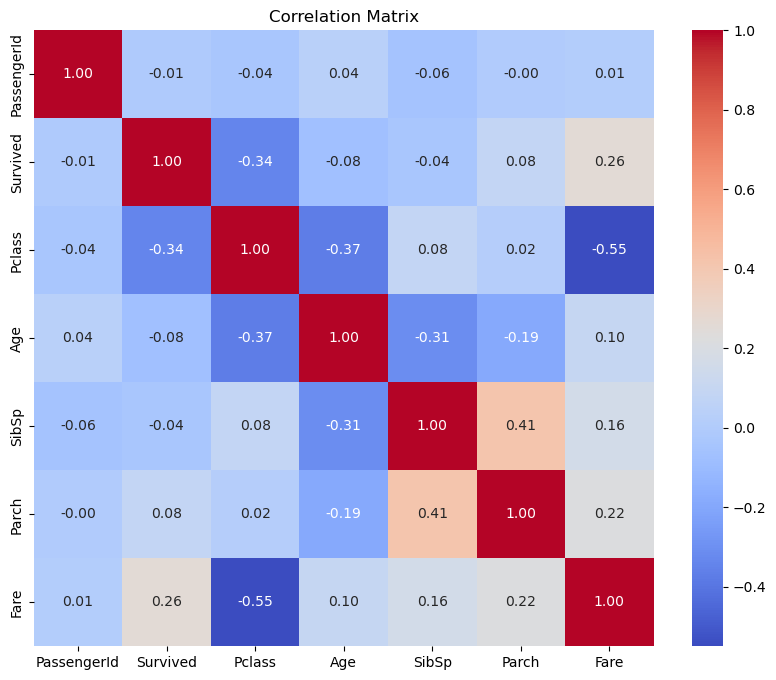

In [9]:
# Step 4: Correlation matrix and heatmap
plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

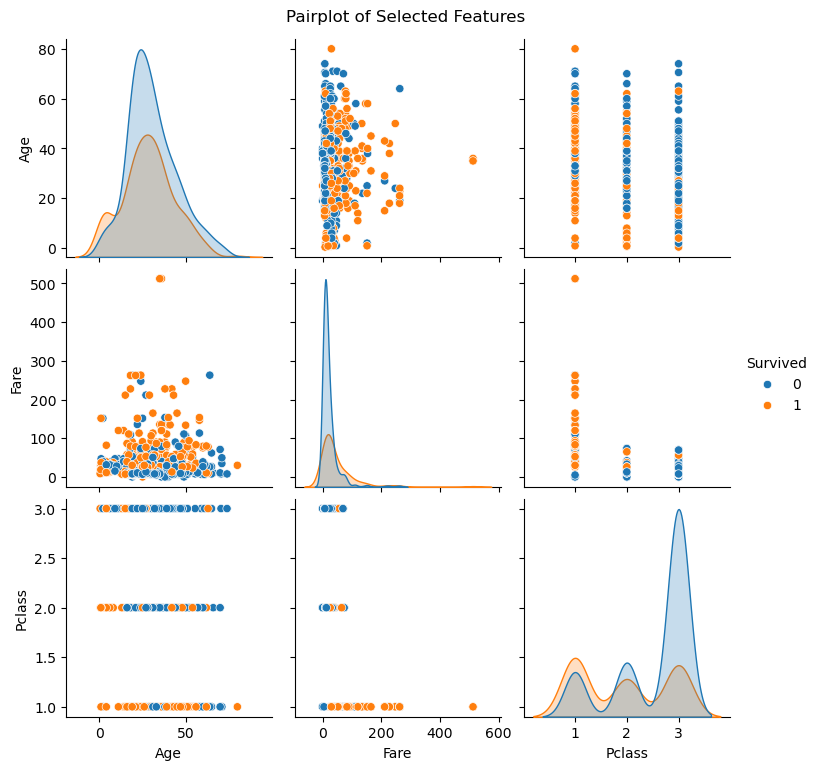

In [10]:
# Step 5: Pairplot (uses only selected features for clarity)
selected_features = ['Age', 'Fare', 'Pclass', 'Survived']
sns.pairplot(df[selected_features], hue='Survived')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

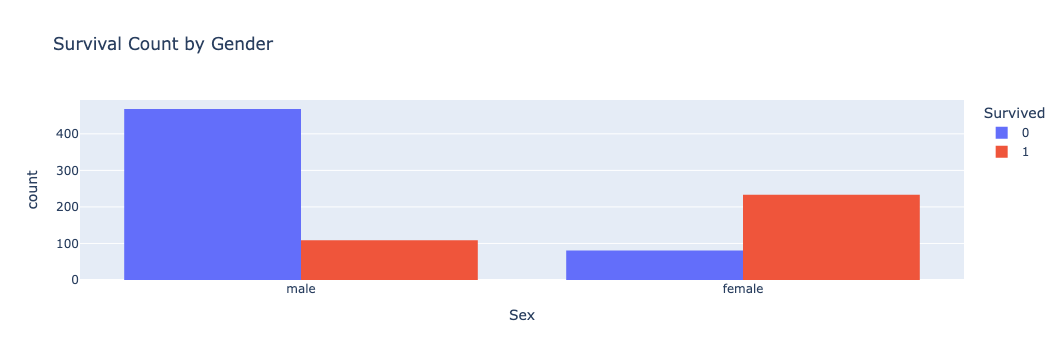

In [11]:
# Step 6: Plotly example – interactive survival by gender
if 'Sex' in df.columns:
    fig = px.histogram(df, x='Sex', color='Survived', barmode='group',
                       title='Survival Count by Gender')
    fig.show()

In [13]:
# Step 7: Inference example
print("\n💡 Basic Inferences:")
if df['Survived'].mean() < 0.5:
    print("- More passengers died than survived.")
if df['Sex'].nunique() == 2:
    survived_by_gender = df.groupby('Sex')['Survived'].mean()
    print("- Survival rate by gender:")
    print(survived_by_gender)


💡 Basic Inferences:
- More passengers died than survived.
- Survival rate by gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
